In [3]:
import pandas as pd
import geopandas as gpd
# from shapely.geometry import Polygon

# import json
from shapely.geometry import mapping
import plotly.express as px

import cecil


In [4]:
# Forest Carbon Monitoring
# https://docs.cecil.earth/Forest-carbon-monitoring-111ef16bbbe4817aa1a8dce6d9216665
# 3.5 m resolution
PLANET_DATASET_ID = '4d8bd6ba-b751-4c46-8e70-5000e6d8b212'
# Cost information for all datasets is available on Cecil's Pricing page
# https://docs.cecil.earth/Pricing-cf107b09599d4638b8f02fc863bd5961
PLANET_COST_PER_HA = 0.25  # USD

# Choose an Area of Interest

Each polygon's area in hectares and number of vertices


,area_ha,vertices
0,8.015337,657
1,0.472040,85
2,0.566890,89
3,1.763921,274
4,1.249553,170


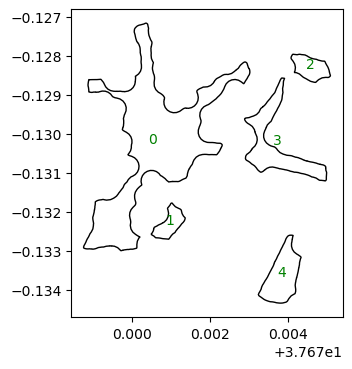

In [5]:
polygons = gpd.read_file('data/intermediate/example_polygons.gpkg', layer='example_polygons')

# Project to UTM zone 37N for accurate area calculation (e.g., UTM zone 37N for Kenya)
polygons_utm = polygons.to_crs(epsg=32637)

# Calculate total area in hectares
total_area_m2 = polygons_utm.geometry.area.sum()

# Calculate number of vertices for each polygon
# Note: This assumes polygons are valid and have an exterior ring
polygons['vertices'] = polygons.geometry.apply(lambda geom: len(geom.exterior.coords) if geom.is_valid else 0)
# Calculate total number of vertices
total_vertices = polygons['vertices'].sum()

# Use the UTM projection to calculate area in hectares
polygons['area_ha'] = polygons_utm.geometry.area / 10000 # 1 hectare = 10,000 m²
total_area_ha = polygons['area_ha'].sum()

print("Each polygon's area in hectares and number of vertices")
display(polygons[['area_ha', 'vertices']])

ax = polygons.plot(figsize=(4,4), edgecolor='black', facecolor='none')
for idx, row in polygons.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(str(idx), xy=(centroid.x, centroid.y), color='green', fontsize=10, ha='center')

# Check vertices count and calculate cost of request
AOI requests through Cecil for the Planet Monitoring Dataset should meet the following requirements:
* The CRS is EPSG:4326
* The total number of vertices per AOI is less than 1,500

The pricing for data requests can be found on [Cecil's Pricing page](https://docs.cecil.earth/Pricing-cf107b09599d4638b8f02fc863bd5961).

In this case, Planet Forest Carbon Monitoring 3m is $0.25/ha.



In [8]:
if polygons.crs != 'EPSG:4326':
    print(f'Warning: Polygons are in {polygons.crs}, but should be in EPSG:4326 for AOI requests through Cecil.')
else:
    print('Polygons are in EPSG:4326, suitable for AOI requests through Cecil.')

if total_vertices > 1500:
    print(f'Warning: Total number of vertices is {total_vertices}, which exceeds the limit of 1,500 for AOI requests for Planet Carbon Monitoring.')
else:
    print(f'Total number of vertices is {total_vertices}, which meets the Planet requirement of 1,500 vertices maximum.')

print("")
print(f'Total area of polygons: {total_area_ha:.2f} hectares')
print(f'Estimated cost of data request: ${total_area_ha * PLANET_COST_PER_HA:.2f} USD at ${PLANET_COST_PER_HA}/ha')


Polygons are in EPSG:4326, suitable for AOI requests through Cecil.
Total number of vertices is 1275, which meets the requirement of <1,500 vertices.

Total area of polygons: 12.07 hectares
Estimated cost of data request: $3.02 USD at $0.25/ha
